# Project Title: Instagram Reach Analysis

### Candidate Name: Mayur Kumar Sharma

### Mail ID: mayur4everyone@gmail.com

## 1. Importing the necessary Python libraries and the dataset

In [1262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [1263]:
data = pd.read_csv("instagram_data.csv", encoding = 'latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


## 2. Cleaning, Null Checks and Other Statistics

In [1264]:
data.shape

(119, 13)

In [1265]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [1266]:
data.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [1267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## 3. Analyzing Instagram Reach

### 3.1 Distribution of impressions received from "home" feature

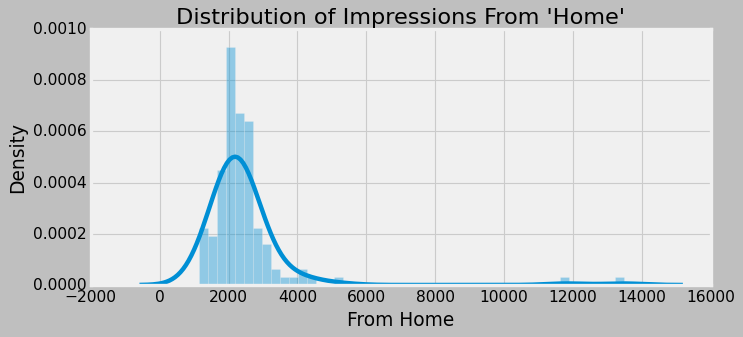

In [1268]:
plt.figure(figsize=(10, 4))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From 'Home'")
sns.distplot(data['From Home'])
plt.show()

## Insight:
### The impressions I get from the home section on Instagram shows how much my posts reach my followers. Looking at the impressions from home, I can say it’s hard to reach all my followers daily.

### 3.2 Distribution of the impressions from 'hashtags'

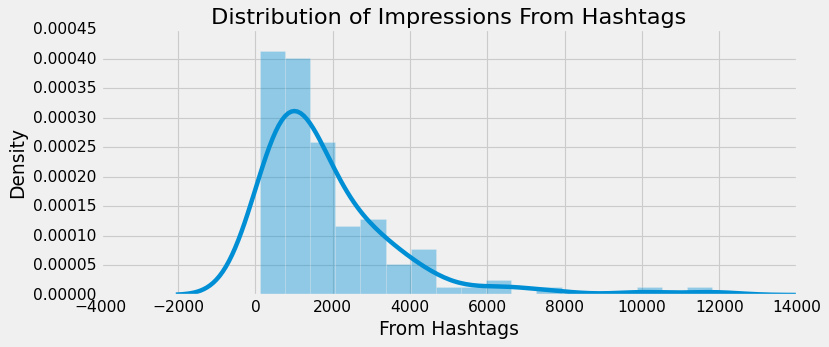

In [1269]:
plt.figure(figsize=(10, 4))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

## Insight:
### Hashtags are tools we use to categorize our posts on Instagram so that we can reach more people based on the kind of content we are creating. Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached from hashtags.

### 3.3 Distribution of impressions from the explore section

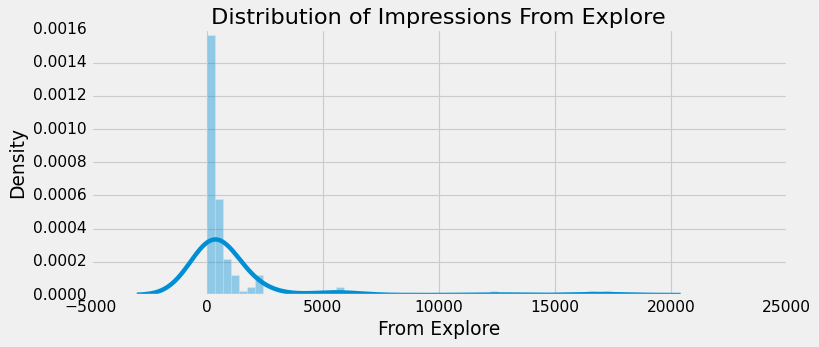

In [1270]:
plt.figure(figsize=(10, 4))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

## Insight:
### The explore section of Instagram is the recommendation system of Instagram. It recommends posts to the users based on their preferences and interests. By looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to the users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

### 3.4 Combining all as the percentage of impressions

In [1271]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.4)
fig.show()

## Insight:
### So the above Pie plot shows that almost 50 per cent of the reach is from my followers, 38.1 per cent is from hashtags, 9.14 per cent is from the explore section, and 3.01 per cent is from other sources.

## 4. Analzsing The Content

### The dataset has two columns, namely caption and hashtags, which will help us understand the kind of content I post on Instagram. 
### (a). Let’s create a wordcloud of the caption column to look at the most used words in the caption of my Instagram posts:

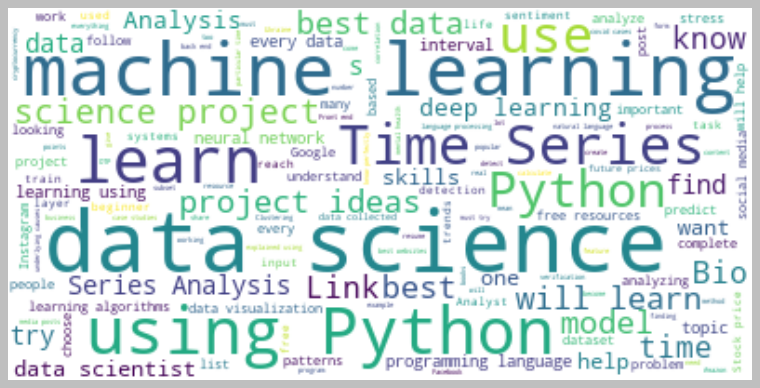

In [1272]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### (b). Now create a wordcloud of the hashtags column to look at the most used hashtags in my Instagram posts:

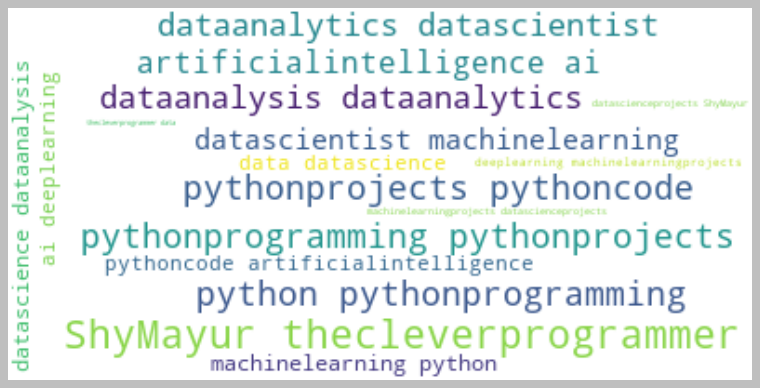

In [1273]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 5. Analyzing Relationships

### Now analyze relationships to find the most important factors of our Instagram reach. It will also help us in understanding how the Instagram algorithm works.
### (a). Relationship between the number of likes and the number of impressions:

In [1274]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

### Insight: There is a linear relationship between the number of likes and the reach I got on Instagram.

### (b). Relationship between the number of comments and the number of impressions:

In [1275]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

### Insight: It looks like the number of comments we get on a post doesn’t affect its reach. 

### (c). Relationship between the number of shares and the number of impressions:

In [1276]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

### Insight: A more number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do.

### (d). Relationship between the number of saves and the number of impressions:

In [1277]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

### Insight: There is a linear relationship between the number of times my post is saved and the reach of my Instagram post.

### (e). Correlation of all the columns with the Impressions column:

In [1278]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


### Insight: So we can say that more likes and saves will help you get more reach on Instagram. The higher number of shares will also help you get more reach, but a low number of shares will not affect your reach either.

## 6. Analyzing Conversion Rate

### In Instagram, conversation rate means how many followers you are getting from the number of profile visits from a post.
### The formula that you can use to calculate conversion rate is (Follows/Profile Visits) * 100.

In [1279]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


### So the conversation rate of my Instagram account is 41% which sounds like a very good conversation rate

### Relationship between the total profile visits and the number of followers gained from all profile visits:

In [1280]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

### Insight: The relationship between profile visits and followers gained is also linear.

## 7. Instagram Reach Prediction Model

### Here we'll train a machine learning model to predict the reach of an Instagram post. Let’s split the data into training and test sets before training the model:

In [1281]:
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Model : Passive Aggressive Regressor

In [1282]:
model = PassiveAggressiveRegressor()

model.fit(xtrain, ytrain)

PassiveAggressiveRegressor()

In [1283]:
model.score(xtest, ytest)

0.9059905718062738

### Now let’s predict the reach of an Instagram post by giving inputs to the machine learning model:

In [1284]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]

features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])

model.predict(features)

array([11551.14035926])

## 8. Summary

### (a). So this is how you can analyze and predict the reach of Instagram posts with machine learning using Python.
### (b). If a content creator wants to do well on Instagram in a long run, they have to look at the data of their Instagram reach.
### (c). That is where the use of Data Science in social media comes in.
### (d). I hope you liked this task of Instagram Reach Analysis using Python. Feel free to ask valuable questions in the mail section.